In [2]:
import numpy
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook,
# not an external window
%matplotlib inline

from model import NeuralNetwork
from utils import load_csv, to_nn_input
from artist import draw_number, draw_dream, rotate_number

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.2
# #create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
train_data = load_csv("data/mnist_train.csv")
test_data = load_csv("data/mnist_test.csv")

In [5]:
# Training
epochs = 5
for e in range(epochs):
    print("Epoch: ", e)
    n.train_dataset(train_data)
    n.train_dataset([rotate_number(i) for i in train_data])
    n.train_dataset([rotate_number(i, -10) for i in train_data])

Epoch:  0


Epoch:  1


Epoch:  2


Epoch:  3


Epoch:  4


7


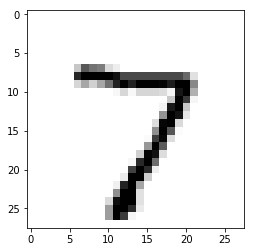

In [5]:
print(test_data[0][0])
draw_number(test_data[0])

In [31]:
input = to_nn_input(test_data[0])
n.query(input)

array([[ 0.03995076],
       [ 0.00210457],
       [ 0.00743725],
       [ 0.00753534],
       [ 0.00102642],
       [ 0.00139327],
       [ 0.00794972],
       [ 0.97266134],
       [ 0.00432417],
       [ 0.00929683]])

In [30]:
scorecard = []
# go through all the records in the test data set
for record in test_data:
    correct_label = int(record[0])
    inputs = to_nn_input(record)
    outputs = n.query(inputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [31]:
scorecard_array = numpy.asarray(scorecard)
print ("performance =", scorecard_array.sum()/ scorecard_array.size)

performance = 0.9586


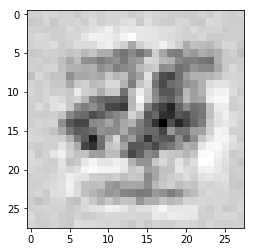

In [6]:
ny_number = 4
targets = numpy.zeros(output_nodes) + 0.01
targets[ny_number] = 0.99
img = n.back_query(targets)
draw_dream(img)

In [14]:
filename="export.nn"
data = n.w_input_hidden.tolist()
data += n.w_hidden_output.tolist()
with open(filename, 'w') as export_file:
    json.dump(data, export_file)


In [11]:
with open(filename, 'r') as import_file:
    data = json.load(import_file)
data[0] = 

1 [ 0.23987693 -0.11564367 -0.04246276 ..., -0.37584458 -0.39428238
 -0.21104677]
2 [[ 0.23987693 -0.11564367 -0.04246276 ...,  0.07191927  0.00424173
   0.05226976]
 [ 0.18125191 -0.0217539  -0.14221374 ...,  0.0361385   0.01753726
  -0.01780579]
 [-0.51182778 -0.53778355 -0.42834705 ..., -0.40467223 -0.45448192
  -0.59867811]
 ..., 
 [-0.50637758 -0.59929259 -0.48755036 ..., -0.44452708 -0.36020642
  -0.36198175]
 [-0.41253125 -0.46669012 -0.3935796  ..., -0.46362302 -0.46414152
  -0.34571183]
 [-0.45625189 -0.44008508 -0.47514188 ..., -0.37584458 -0.39428238
  -0.21104677]]
